# Classifier: Support Vector Machine (SVM)

In [1]:
# Import Python Libraries
import os
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np

from sklearn.feature_extraction import DictVectorizer
from sklearn import datasets
from sklearn.svm import SVC

### Load & Inspect Cleaned Data

In [2]:
# Read cleaned data into pandas & create dataframe
df = pd.read_csv(os.path.join(".", "Cleaned_Data", "chromatic.csv"))
df.head()

,0,1,2,3,4,5,6,7,8,9,...,111,112,113,114,115,Latitude,Longitude,Country,Region,Sub_Region
0,7.161286,7.835325,2.911583,0.984049,-1.499546,-2.094097,0.576000,-1.205671,1.849122,-0.425598,...,-0.364194,-0.364194,-0.364194,-0.364194,-0.364194,-15.75,-47.95,Brazil,South America,South America
1,0.225763,-0.094169,-0.603646,0.497745,0.874036,0.290280,-0.077659,-0.887385,0.432062,-0.093963,...,0.936616,0.936616,0.936616,0.936616,0.936616,14.91,-23.51,Cabo Verde,Africa,Western Africa
2,-0.692525,-0.517801,-0.788035,1.214351,-0.907214,0.880213,0.406899,-0.694895,-0.901869,-1.701574,...,0.603755,0.603755,0.603755,0.603755,0.603755,12.65,-8.00,Mali,Africa,Western Africa
3,-0.735562,-0.684055,2.058215,0.716328,-0.011393,0.805396,1.497982,0.114752,0.692847,0.052377,...,0.187169,0.187169,0.187169,0.187169,0.187169,9.03,38.74,Ethiopia,Africa,Eastern Africa
4,0.570272,0.273157,-0.279214,0.083456,1.049331,-0.869295,-0.265858,-0.401676,-0.872639,1.147483,...,1.620715,1.620715,1.620715,1.620715,1.620715,34.03,-6.85,Morocco,Africa,Northern Africa


In [3]:
# Determine data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Columns: 121 entries, 0 to Sub_Region
dtypes: float64(118), object(3)
memory usage: 1001.2+ KB


In [4]:
# Drop all columns except inputs and desired output column
dropped_column_list = ['Latitude', 'Longitude', 'Country', 'Region']
df.drop(dropped_column_list, axis=1, inplace=True)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,107,108,109,110,111,112,113,114,115,Sub_Region
0,7.161286,7.835325,2.911583,0.984049,-1.499546,-2.094097,0.576000,-1.205671,1.849122,-0.425598,...,-0.364194,-0.364194,-0.364194,-0.364194,-0.364194,-0.364194,-0.364194,-0.364194,-0.364194,South America
1,0.225763,-0.094169,-0.603646,0.497745,0.874036,0.290280,-0.077659,-0.887385,0.432062,-0.093963,...,0.936616,0.936616,0.936616,0.936616,0.936616,0.936616,0.936616,0.936616,0.936616,Western Africa
2,-0.692525,-0.517801,-0.788035,1.214351,-0.907214,0.880213,0.406899,-0.694895,-0.901869,-1.701574,...,0.603755,0.603755,0.603755,0.603755,0.603755,0.603755,0.603755,0.603755,0.603755,Western Africa
3,-0.735562,-0.684055,2.058215,0.716328,-0.011393,0.805396,1.497982,0.114752,0.692847,0.052377,...,0.187169,0.187169,0.187169,0.187169,0.187169,0.187169,0.187169,0.187169,0.187169,Eastern Africa
4,0.570272,0.273157,-0.279214,0.083456,1.049331,-0.869295,-0.265858,-0.401676,-0.872639,1.147483,...,1.620715,1.620715,1.620715,1.620715,1.620715,1.620715,1.620715,1.620715,1.620715,Northern Africa


In [5]:
# Count number of unique entries in target column (this will be our y variable)
df['Sub_Region'].nunique()

15

In [6]:
# Determine number of entries per unique entry in target column
df['Sub_Region'].value_counts()

Southern Asia                139
Western Africa               124
Southern Europe              118
Northern Africa               99
Western Asia                  93
South-eastern Asia            91
Eastern Asia                  84
Eastern Africa                82
Northern Europe               65
Central Asia                  62
South America                 36
Caribbean                     22
Eastern Europe                19
Australia and New Zealand     14
Central America               11
Name: Sub_Region, dtype: int64

### Define X and y

In [7]:
# Reformat data
data = df.values
X = data[:, 0:115]

y = df['Sub_Region']
y.value_counts()

Southern Asia                139
Western Africa               124
Southern Europe              118
Northern Africa               99
Western Asia                  93
South-eastern Asia            91
Eastern Asia                  84
Eastern Africa                82
Northern Europe               65
Central Asia                  62
South America                 36
Caribbean                     22
Eastern Europe                19
Australia and New Zealand     14
Central America               11
Name: Sub_Region, dtype: int64

### Label Encode Data

In [8]:
# Label-encode data set
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y)
encoded_y = label_encoder.transform(y)
print(encoded_y)

[ 9 13 13 ... 12  8  8]


### Create Training and Testing Sets

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# NOTE: Random state ensures that the splits that we generate are reproducible.Scikit-learn uses random permutations to 
# generate the splits.The random state that you provide is used as a seed to the random number generator. This ensures
# that the random numbers are generated in the same order.

### Inspect the Shape of the Data

In [10]:
print('X_train Shape:', X_train.shape)
print('y_train Shape:', y_train.shape)
print('X_test Shape:', X_test.shape)
print('y_test Shape:', y_test.shape)

X_train Shape: (794, 115)
y_train Shape: (794,)
X_test Shape: (265, 115)
y_test Shape: (265,)


### Begin Support Vector Machine (SVM) linear classifier

In [11]:
# SVM or Support Vector Machine is a linear model for classification and regression problems. It can solve linear and 
# non-linear problems and work well for many practical problems. The idea of SVM is simple: The algorithm creates a line
# or a hyperplane which separates the data into classes.

In [12]:
# Import SVM
from sklearn.svm import SVC 
model = SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(kernel='linear')

In [13]:
# Model Accuracy
print('Test Acc: %.3f' % model.score(X_test, y_test))

Test Acc: 0.411


In [14]:
# HOW TO INTERPRET CLASSIFICATION REPORT

# PRECISION
# Precision is a measure of a classifier’s exactness. It is the fraction of predicted positives events that are actually
# positive. For each class, it is defined as the ratio of true positives to the sum of true & false positives. Said 
# another way, “for all instances classified positive, what percent was correct?

# RECALL
# Recall (also known as sensitivity) is the fraction of positives events that you predicted correctly.
# Recall is a measure of the classifier’s completeness; the ability of a classifier to correctly find all positive 
# instances. For each class, it is defined as the ratio of true positives to the sum of true positives & false 
# negatives. Said another way, “for all instances that were actually positive, what percent was classified correctly?”

# F1 SCORE
# The f1 score is the harmonic mean of recall and precision, with a higher score as a better model.
# The F1 score is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0.
# Generally speaking, F1 scores are lower than accuracy measures as they embed precision and recall into their 
# computation. As a rule of thumb, the weighted average of F1 should be used to compare classifier models, not global 
# accuracy.

# SUPPORT
# Support is the number of actual occurrences of the class in the specified dataset. Imbalanced support in the training
# data may indicate structural weaknesses in the reported scores of the classifier and could indicate the need for 
# stratified sampling or rebalancing. Support doesn’t change between models, instead it diagnoses the evaluation process.

# ACCURACY
# The most common metric for classification is Accuracy, which is the fraction of samples predicted correctly.  
# But Accuracy is not always the best metric to use to assess classification models. 

# MACRO AVERAGE
# Macro Average takes the function to compute f1 for each label, and returns the average without considering the 
# proportion for each label in the dataset. 

# WEIGHTED AVERAGE
# Weighted Average takes the function to compute f1 for each label, and returns the average considering the proportion
# for each label in the dataset.

In [15]:
# Calculate & print classification report
from sklearn.metrics import classification_report
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))

                           precision    recall  f1-score   support

Australia and New Zealand       0.67      0.50      0.57         4
                Caribbean       0.67      0.86      0.75         7
          Central America       1.00      0.67      0.80         3
             Central Asia       0.32      0.41      0.36        17
           Eastern Africa       0.40      0.50      0.44        16
             Eastern Asia       0.35      0.33      0.34        24
           Eastern Europe       0.75      0.60      0.67         5
          Northern Africa       0.23      0.35      0.28        23
          Northern Europe       0.52      0.80      0.63        15
            South America       0.17      0.29      0.21         7
       South-eastern Asia       0.37      0.50      0.42        14
            Southern Asia       0.54      0.33      0.41        45
          Southern Europe       0.50      0.33      0.40        30
           Western Africa       0.30      0.28      0.29     

NameError: name 'visualizer' is not defined

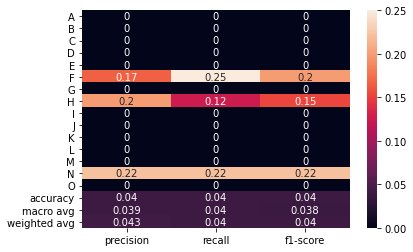

In [16]:
import seaborn as sns
from sklearn.metrics import classification_report

true = np.random.randint(0, 15, size=100)
pred = np.random.randint(0, 15, size=100)
labels = np.arange(15)
target_names = list("ABCDEFGHIJKLMNO")

clf_report = classification_report(true,
                                   pred,
                                   labels=labels,
                                   target_names=target_names,
                                   output_dict=True)

# .iloc[:-1, :] to exclude support
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)
visualizer.show(outpath='./images/Chromatc Sub-Region - Parallel Coordinates for 115 Features.png')

In [ ]:
from yellowbrick.features import ParallelCoordinates

visualizer = ParallelCoordinates()
visualizer.fit_transform(X, y)
visualizer.show()
visualizer.show(outpath='./images/Chromatc Sub-Region - Parallel Coordinates for 115 Features.png')

In [ ]:
from sklearn import svm

In [ ]:
# Initialize SVM classifier
clf = svm.SVC(kernel='linear')

In [ ]:
clf = clf.fit(X_train, y_train)

In [ ]:
# Get support vectors
support_vectors = clf.support_vectors_

# Visualize support vectors
plt.scatter(X_train[:,0], X_train[:,1])
plt.scatter(support_vectors[:,0], support_vectors[:,1], color='red')
plt.title('Linearly separable data with support vectors')
plt.xlabel('X1')
plt.ylabel('X2')
plt.savefig('./images/Chromatc Sub-Region - Linearly Separable Data with Support Vectors.png')
plt.show()

# Prediction Error Plot

In [ ]:
# A prediction error plot shows the actual targets from the dataset against the predicted values generated by our model.
# This allows us to see how much variance is in the model. We can diagnose the regression models using this 
# plot by comparing against the 45 degree line, where the prediction exactly matches the model.

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import PredictionError

# Load a regression dataset
X, y = load_concrete()

# Create the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the linear model and visualizer
model = Lasso()
visualizer = PredictionError(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure
visualizer.show(outpath='./images/Chromatc Sub-Region - Prediction Error.png')

# Threshold Plot for Logistic Regression

In [ ]:
# Linear regression is used for predicting the continuous dependent variable using a given set of independent features
# whereas Logistic Regression is used to predict the categorical. Linear regression is used to solve regression problems
# whereas logistic regression is used to solve classification problems.

In [ ]:
from sklearn.linear_model import LogisticRegression

from yellowbrick.classifier import DiscriminationThreshold
from yellowbrick.datasets import load_spam

# Load a binary classification dataset
X, y = load_spam()

# Instantiate the classification model and visualizer
model = LogisticRegression(multi_class="auto", solver="liblinear")
visualizer = DiscriminationThreshold(model)

visualizer.fit(X, y)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure
visualizer.show(outpath='./images/Chromatc Sub-Region - Threshold Plot for LogisticRegression.png')

In [ ]:
from sklearn import metrics
from neupy import algorithms
from sklearn.base import BaseEstimator
from yellowbrick.datasets import load_occupancy
from yellowbrick.classifier import ClassificationReport
from sklearn.model_selection import train_test_split


class PNNWrapper(algorithms.PNN, BaseEstimator):
    """
    The PNN wrapper implements BaseEstimator and allows the classification
    report to score the model and understand the learned classes.
    """

    @property
    def classes_(self):
        return self.classes

    def score(self, X_test, y_test):
        y_hat = self.predict(X_test)
        return metrics.accuracy_score(y_test, y_hat)


# Load the binary classification dataset 
X, y = load_occupancy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create and train the PNN model using the sklearn wrapper
model = PNNWrapper(std=0.1, verbose=True, batch_size=1059)
model.train(X_train, y_train)

# Create the classification report
viz = ClassificationReport(
    model, 
    support=True, 
    classes=["not occupied", "occupied"], 
    is_fitted=True, 
    force_model=True, 
    title="PNN"
)

# Score the report and show it
viz.score(X_test, y_test)
viz.show()
viz.show(outpath='./images/Chromatc Sub-Region - PNN Wrapper.png')